In [2]:
import os
import zipfile

local_zip = 'C:\\Users'
print(os.path.join(local_zip, 'Sagar Mishra'))

C:\Users\Sagar Mishra


In [ ]:
os.getcwd()

In [ ]:
os.chdir('C:\\Users\\Sagar Mishra\\Desktop\\Data')

In [ ]:
os.getcwd()

In [ ]:
os.listdir(os.getcwd())

In [ ]:
file1 = os.path.join(os.getcwd(), 'fruits.zip')
file1

In [ ]:
local_zip = file1
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('C:\\Users\\Sagar Mishra\\jupyter notebooks')
zip_ref.close()

In [3]:
train_path = 'C:\\Users\\Sagar Mishra\\jupyter notebooks\\fruits-360_dataset\\fruits-360\\Training'
test_path = 'C:\\Users\\Sagar Mishra\\jupyter notebooks\\fruits-360_dataset\\fruits-360\\Test'

all_avail_names = os.listdir(train_path)
print(len(all_avail_names))
print(all_avail_names)

120
['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Dates', 'Eggplant', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melon Piel de Sapo', 'Mulberry', 'Nectarine', 'Nectarine Flat', 

In [4]:
train_path_sub = []
test_path_sub = []

for names in all_avail_names:
  train_path_sub.append(os.path.join(train_path, names))
  test_path_sub.append(os.path.join(test_path, names))

print(len(train_path_sub))
print(len(test_path_sub))
print(train_path_sub[0])

120
120
C:\Users\Sagar Mishra\jupyter notebooks\fruits-360_dataset\fruits-360\Training\Apple Braeburn


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

temp = os.listdir(train_path_sub[0])
print(len(temp))

492


In [ ]:
print(temp[0:5])

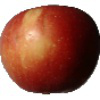

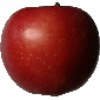

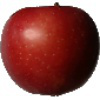

In [6]:
from PIL import Image

for image_path in temp[0:3]:
  image_path_complete = os.path.join(train_path_sub[0],image_path)
  display.display(Image.open(str(image_path_complete)))

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
shear_range = 0.01,
zoom_range = [0.9, 1.25],
horizontal_flip = True,
vertical_flip = True,
rotation_range = 15,
brightness_range = [0.5, 1.5],
width_shift_range = 0.1,
height_shift_range = 0.1                                   
                                  )
train_generator = train_datagen.flow_from_directory(
directory = train_path,
batch_size = 128,
shuffle = True,
target_size = (100, 100)
)

Found 60498 images belonging to 120 classes.


In [24]:
test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
directory = test_path,
target_size = (100, 100))

Found 20622 images belonging to 120 classes.


In [25]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (5,5), input_shape=(100, 100, 3), activation = 'relu'),
  tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
  tf.keras.layers.Conv2D(32, (5, 5), activation = 'relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides = 2),
  tf.keras.layers.Conv2D(64, (5, 5), activation = 'relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides = 2),
  tf.keras.layers.Conv2D(128, (5, 5), activation = 'relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation = 'relu' ),
  tf.keras.layers.Dense(256, activation = 'relu'),
  tf.keras.layers.Dense(120, activation = 'softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 96, 96, 16)        1216      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 44, 44, 32)        12832     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 18, 18, 64)        51264     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 5, 5, 128)        

In [21]:
import warnings

warnings.simplefilter('ignore')

In [26]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

class myCallBacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if logs.get('loss') < 0.02:
      print("\n Ending the training, don't be greedy.")
      self.model.stop_training = True
      
callback = myCallBacks()
history = model.fit_generator(
train_generator,
steps_per_epoch=60,
epochs= 7500,
verbose=2,
callbacks=[callback],
validation_data = test_generator,
validation_steps = 50,
shuffle=True)

Epoch 1/7500
60/60 - 62s - loss: 4.3492 - accuracy: 0.0353 - val_loss: 14.8528 - val_accuracy: 0.0731
Epoch 2/7500
60/60 - 59s - loss: 2.8923 - accuracy: 0.1975 - val_loss: 11.9157 - val_accuracy: 0.2544
Epoch 3/7500
60/60 - 62s - loss: 1.9391 - accuracy: 0.3941 - val_loss: 9.0729 - val_accuracy: 0.4306
Epoch 4/7500
60/60 - 65s - loss: 1.5430 - accuracy: 0.5010 - val_loss: 6.7880 - val_accuracy: 0.5700
Epoch 5/7500
60/60 - 55s - loss: 1.2582 - accuracy: 0.5965 - val_loss: 6.8337 - val_accuracy: 0.5713
Epoch 6/7500
60/60 - 44s - loss: 1.1817 - accuracy: 0.6173 - val_loss: 5.7452 - val_accuracy: 0.6369
Epoch 7/7500
60/60 - 64s - loss: 0.9801 - accuracy: 0.6846 - val_loss: 5.0685 - val_accuracy: 0.6800
Epoch 8/7500
60/60 - 48s - loss: 0.8562 - accuracy: 0.7177 - val_loss: 5.5217 - val_accuracy: 0.6525
Epoch 9/7500
60/60 - 64s - loss: 0.7895 - accuracy: 0.7480 - val_loss: 5.1691 - val_accuracy: 0.6769
Epoch 10/7500
60/60 - 62s - loss: 0.6633 - accuracy: 0.7773 - val_loss: 4.4406 - val_accu

Epoch 82/7500
60/60 - 71s - loss: 0.1208 - accuracy: 0.9582 - val_loss: 1.5753 - val_accuracy: 0.9013
Epoch 83/7500
60/60 - 72s - loss: 0.1146 - accuracy: 0.9608 - val_loss: 0.8194 - val_accuracy: 0.9481
Epoch 84/7500
60/60 - 67s - loss: 0.1448 - accuracy: 0.9516 - val_loss: 1.6137 - val_accuracy: 0.8994
Epoch 85/7500
60/60 - 64s - loss: 0.1479 - accuracy: 0.9526 - val_loss: 2.3051 - val_accuracy: 0.8556
Epoch 86/7500
60/60 - 68s - loss: 0.0906 - accuracy: 0.9690 - val_loss: 1.2943 - val_accuracy: 0.9187
Epoch 87/7500
60/60 - 65s - loss: 0.1310 - accuracy: 0.9578 - val_loss: 2.1986 - val_accuracy: 0.8619
Epoch 88/7500
60/60 - 68s - loss: 0.1410 - accuracy: 0.9552 - val_loss: 1.8334 - val_accuracy: 0.8863
Epoch 89/7500
60/60 - 68s - loss: 0.0856 - accuracy: 0.9707 - val_loss: 0.9974 - val_accuracy: 0.9381
Epoch 90/7500
60/60 - 63s - loss: 0.0950 - accuracy: 0.9647 - val_loss: 1.3988 - val_accuracy: 0.9125
Epoch 91/7500
60/60 - 65s - loss: 0.0957 - accuracy: 0.9676 - val_loss: 1.0936 - v

Epoch 162/7500
60/60 - 62s - loss: 0.0875 - accuracy: 0.9720 - val_loss: 0.9553 - val_accuracy: 0.9400
Epoch 163/7500
60/60 - 62s - loss: 0.0783 - accuracy: 0.9753 - val_loss: 0.9103 - val_accuracy: 0.9419
Epoch 164/7500
60/60 - 61s - loss: 0.0843 - accuracy: 0.9719 - val_loss: 1.8357 - val_accuracy: 0.8856
Epoch 165/7500
60/60 - 62s - loss: 0.1423 - accuracy: 0.9553 - val_loss: 1.0967 - val_accuracy: 0.9306
Epoch 166/7500
60/60 - 67s - loss: 0.0548 - accuracy: 0.9826 - val_loss: 1.3045 - val_accuracy: 0.9187
Epoch 167/7500
60/60 - 69s - loss: 0.0876 - accuracy: 0.9707 - val_loss: 1.0376 - val_accuracy: 0.9356
Epoch 168/7500
60/60 - 70s - loss: 0.0874 - accuracy: 0.9711 - val_loss: 1.2870 - val_accuracy: 0.9200
Epoch 169/7500
60/60 - 67s - loss: 0.0922 - accuracy: 0.9717 - val_loss: 1.2370 - val_accuracy: 0.9231
Epoch 170/7500
60/60 - 63s - loss: 0.0735 - accuracy: 0.9768 - val_loss: 1.0956 - val_accuracy: 0.9312
Epoch 171/7500
60/60 - 64s - loss: 0.0569 - accuracy: 0.9815 - val_loss: 

Epoch 242/7500
60/60 - 74s - loss: 0.0817 - accuracy: 0.9751 - val_loss: 0.8749 - val_accuracy: 0.9456
Epoch 243/7500
60/60 - 81s - loss: 0.0641 - accuracy: 0.9809 - val_loss: 1.0275 - val_accuracy: 0.9362
Epoch 244/7500
60/60 - 89s - loss: 0.0678 - accuracy: 0.9794 - val_loss: 1.0276 - val_accuracy: 0.9362
Epoch 245/7500
60/60 - 66s - loss: 0.0717 - accuracy: 0.9775 - val_loss: 1.4012 - val_accuracy: 0.9125
Epoch 246/7500
60/60 - 68s - loss: 0.0737 - accuracy: 0.9768 - val_loss: 0.5619 - val_accuracy: 0.9650
Epoch 247/7500
60/60 - 57s - loss: 0.0720 - accuracy: 0.9766 - val_loss: 0.9858 - val_accuracy: 0.9381
Epoch 248/7500
60/60 - 61s - loss: 0.0584 - accuracy: 0.9816 - val_loss: 1.0440 - val_accuracy: 0.9350
Epoch 249/7500
60/60 - 64s - loss: 0.0422 - accuracy: 0.9854 - val_loss: 1.2597 - val_accuracy: 0.9206
Epoch 250/7500
60/60 - 62s - loss: 0.0814 - accuracy: 0.9753 - val_loss: 1.2724 - val_accuracy: 0.9200
Epoch 251/7500
60/60 - 58s - loss: 0.0830 - accuracy: 0.9740 - val_loss: 

Epoch 322/7500
60/60 - 41s - loss: 0.0552 - accuracy: 0.9845 - val_loss: 0.9574 - val_accuracy: 0.9406
Epoch 323/7500
60/60 - 54s - loss: 0.0505 - accuracy: 0.9858 - val_loss: 0.7858 - val_accuracy: 0.9513
Epoch 324/7500
60/60 - 71s - loss: 0.0439 - accuracy: 0.9863 - val_loss: 0.8612 - val_accuracy: 0.9463
Epoch 325/7500
60/60 - 72s - loss: 0.0562 - accuracy: 0.9839 - val_loss: 1.6737 - val_accuracy: 0.8956
Epoch 326/7500
60/60 - 65s - loss: 0.0953 - accuracy: 0.9736 - val_loss: 0.5742 - val_accuracy: 0.9644
Epoch 327/7500
60/60 - 67s - loss: 0.0595 - accuracy: 0.9833 - val_loss: 1.2391 - val_accuracy: 0.9231
Epoch 328/7500
60/60 - 69s - loss: 0.1281 - accuracy: 0.9690 - val_loss: 1.8039 - val_accuracy: 0.8875
Epoch 329/7500
60/60 - 69s - loss: 0.0977 - accuracy: 0.9714 - val_loss: 0.5939 - val_accuracy: 0.9619
Epoch 330/7500
60/60 - 71s - loss: 0.0685 - accuracy: 0.9792 - val_loss: 0.8270 - val_accuracy: 0.9481
Epoch 331/7500
60/60 - 64s - loss: 0.0987 - accuracy: 0.9753 - val_loss: 

Epoch 402/7500
60/60 - 63s - loss: 0.0434 - accuracy: 0.9875 - val_loss: 0.7791 - val_accuracy: 0.9513
Epoch 403/7500
60/60 - 60s - loss: 0.0620 - accuracy: 0.9820 - val_loss: 1.7343 - val_accuracy: 0.8919
Epoch 404/7500
60/60 - 62s - loss: 0.0755 - accuracy: 0.9786 - val_loss: 1.6118 - val_accuracy: 0.9000
Epoch 405/7500
60/60 - 70s - loss: 0.0634 - accuracy: 0.9847 - val_loss: 0.7648 - val_accuracy: 0.9525
Epoch 406/7500
60/60 - 60s - loss: 0.0514 - accuracy: 0.9862 - val_loss: 0.7475 - val_accuracy: 0.9531
Epoch 407/7500
60/60 - 62s - loss: 0.0697 - accuracy: 0.9799 - val_loss: 1.0406 - val_accuracy: 0.9344
Epoch 408/7500
60/60 - 67s - loss: 0.0672 - accuracy: 0.9812 - val_loss: 1.0144 - val_accuracy: 0.9356
Epoch 409/7500
60/60 - 63s - loss: 0.0446 - accuracy: 0.9870 - val_loss: 0.6963 - val_accuracy: 0.9556
Epoch 410/7500
60/60 - 65s - loss: 0.0465 - accuracy: 0.9875 - val_loss: 0.9689 - val_accuracy: 0.9394
Epoch 411/7500
60/60 - 62s - loss: 0.0443 - accuracy: 0.9867 - val_loss: 

Epoch 482/7500
60/60 - 71s - loss: 0.0412 - accuracy: 0.9885 - val_loss: 0.9642 - val_accuracy: 0.9394
Epoch 483/7500
60/60 - 68s - loss: 0.0335 - accuracy: 0.9893 - val_loss: 0.9066 - val_accuracy: 0.9438
Epoch 484/7500
60/60 - 65s - loss: 0.0685 - accuracy: 0.9809 - val_loss: 0.9068 - val_accuracy: 0.9438
Epoch 485/7500
60/60 - 67s - loss: 0.0758 - accuracy: 0.9786 - val_loss: 1.0904 - val_accuracy: 0.9312
Epoch 486/7500
60/60 - 59s - loss: 0.0820 - accuracy: 0.9802 - val_loss: 1.5917 - val_accuracy: 0.9013
Epoch 487/7500
60/60 - 66s - loss: 0.0891 - accuracy: 0.9770 - val_loss: 1.1449 - val_accuracy: 0.9287
Epoch 488/7500
60/60 - 66s - loss: 0.1622 - accuracy: 0.9738 - val_loss: 1.0640 - val_accuracy: 0.9331
Epoch 489/7500
60/60 - 68s - loss: 0.0675 - accuracy: 0.9801 - val_loss: 0.7777 - val_accuracy: 0.9513
Epoch 490/7500
60/60 - 68s - loss: 0.0524 - accuracy: 0.9872 - val_loss: 1.1283 - val_accuracy: 0.9300
Epoch 491/7500
60/60 - 66s - loss: 0.0692 - accuracy: 0.9818 - val_loss: 

Epoch 562/7500
60/60 - 64s - loss: 0.0638 - accuracy: 0.9852 - val_loss: 1.2400 - val_accuracy: 0.9225
Epoch 563/7500
60/60 - 65s - loss: 0.0646 - accuracy: 0.9848 - val_loss: 0.9287 - val_accuracy: 0.9419
Epoch 564/7500
60/60 - 63s - loss: 0.0374 - accuracy: 0.9896 - val_loss: 1.0074 - val_accuracy: 0.9375
Epoch 565/7500
60/60 - 65s - loss: 0.0343 - accuracy: 0.9910 - val_loss: 1.0852 - val_accuracy: 0.9319
Epoch 566/7500
60/60 - 60s - loss: 0.0351 - accuracy: 0.9883 - val_loss: 0.6448 - val_accuracy: 0.9600
Epoch 567/7500
60/60 - 61s - loss: 0.0292 - accuracy: 0.9921 - val_loss: 0.6191 - val_accuracy: 0.9613
Epoch 568/7500
60/60 - 54s - loss: 0.0317 - accuracy: 0.9905 - val_loss: 0.7999 - val_accuracy: 0.9500
Epoch 569/7500
60/60 - 64s - loss: 0.0362 - accuracy: 0.9889 - val_loss: 0.5413 - val_accuracy: 0.9663
Epoch 570/7500
60/60 - 49s - loss: 0.0411 - accuracy: 0.9893 - val_loss: 1.1283 - val_accuracy: 0.9300
Epoch 571/7500
60/60 - 62s - loss: 0.0268 - accuracy: 0.9932 - val_loss: 

Epoch 642/7500
60/60 - 63s - loss: 0.0327 - accuracy: 0.9910 - val_loss: 0.7253 - val_accuracy: 0.9550
Epoch 643/7500
60/60 - 50s - loss: 0.0354 - accuracy: 0.9910 - val_loss: 1.3387 - val_accuracy: 0.9162
Epoch 644/7500
60/60 - 61s - loss: 0.0708 - accuracy: 0.9837 - val_loss: 1.0945 - val_accuracy: 0.9312
Epoch 645/7500
60/60 - 62s - loss: 0.0605 - accuracy: 0.9866 - val_loss: 1.5131 - val_accuracy: 0.9050
Epoch 646/7500
60/60 - 59s - loss: 0.0739 - accuracy: 0.9824 - val_loss: 0.9538 - val_accuracy: 0.9400
Epoch 647/7500
60/60 - 47s - loss: 0.0439 - accuracy: 0.9891 - val_loss: 1.1745 - val_accuracy: 0.9262
Epoch 648/7500
60/60 - 55s - loss: 0.0548 - accuracy: 0.9853 - val_loss: 1.3283 - val_accuracy: 0.9169
Epoch 649/7500
60/60 - 54s - loss: 0.0772 - accuracy: 0.9831 - val_loss: 1.2751 - val_accuracy: 0.9200
Epoch 650/7500
60/60 - 59s - loss: 0.0990 - accuracy: 0.9738 - val_loss: 1.8133 - val_accuracy: 0.8875
Epoch 651/7500
60/60 - 66s - loss: 0.0929 - accuracy: 0.9781 - val_loss: 

Epoch 722/7500
60/60 - 61s - loss: 0.0840 - accuracy: 0.9831 - val_loss: 0.9735 - val_accuracy: 0.9394
Epoch 723/7500
60/60 - 46s - loss: 0.1278 - accuracy: 0.9757 - val_loss: 0.8261 - val_accuracy: 0.9488
Epoch 724/7500
60/60 - 57s - loss: 0.0943 - accuracy: 0.9820 - val_loss: 0.8261 - val_accuracy: 0.9488
Epoch 725/7500
60/60 - 52s - loss: 0.1017 - accuracy: 0.9786 - val_loss: 1.3929 - val_accuracy: 0.9125
Epoch 726/7500
60/60 - 67s - loss: 0.0950 - accuracy: 0.9799 - val_loss: 0.8474 - val_accuracy: 0.9469
Epoch 727/7500
60/60 - 66s - loss: 0.0521 - accuracy: 0.9879 - val_loss: 0.7455 - val_accuracy: 0.9538
Epoch 728/7500
60/60 - 68s - loss: 0.0606 - accuracy: 0.9870 - val_loss: 0.9498 - val_accuracy: 0.9400
Epoch 729/7500
60/60 - 53s - loss: 0.0879 - accuracy: 0.9807 - val_loss: 0.9872 - val_accuracy: 0.9388
Epoch 730/7500
60/60 - 65s - loss: 0.0793 - accuracy: 0.9827 - val_loss: 0.7253 - val_accuracy: 0.9550
Epoch 731/7500
60/60 - 63s - loss: 0.0846 - accuracy: 0.9842 - val_loss: 

In [27]:
tf.keras.models.save_model(model, "model_")
model.save_weights("model_fruits.h5")